In [1]:
#pip install geopandas

In [2]:
#pip install folium matplotlib mapclassify

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import geopandas as gpd 
import matplotlib.pyplot as plt
import numpy as np
from math import pi, sqrt
from matplotlib.patches import ConnectionPatch

from shapely import geometry
import math

In [18]:
df = gpd.read_file("BF_10_03_2020.zip")

In [20]:
# df2 = gpd.read_file("BF_08_02_2020.zip")
df2 = df.copy()

In [21]:
df.head()

,mvt_id,DN,geometry
0,None,4.0,"POLYGON ((-12386059.874 3999557.689, -12386059..."
1,None,4.0,"POLYGON ((-12386059.071 3999554.741, -12386059..."
2,None,4.0,"POLYGON ((-12386059.538 3999554.349, -12386059..."
3,None,4.0,"POLYGON ((-12386058.418 3999557.932, -12386058..."
4,None,4.0,"POLYGON ((-12386057.896 3999557.932, -12386057..."


In [25]:
df2['geometry'] = df2.translate(0, 10)

In [26]:
df.head()

,mvt_id,DN,geometry
0,None,4.0,"POLYGON ((-12386059.874 3999557.689, -12386059..."
1,None,4.0,"POLYGON ((-12386059.071 3999554.741, -12386059..."
2,None,4.0,"POLYGON ((-12386059.538 3999554.349, -12386059..."
3,None,4.0,"POLYGON ((-12386058.418 3999557.932, -12386058..."
4,None,4.0,"POLYGON ((-12386057.896 3999557.932, -12386057..."


<AxesSubplot:>

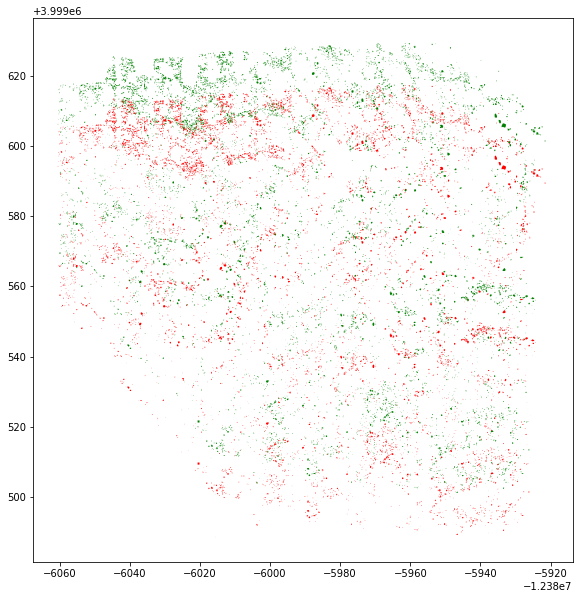

In [27]:
fig, ax = plt.subplots(figsize = (10,10))
fig.patch.set_facecolor('white')


df2.plot(color = 'g', ax=ax, figsize=(10,10))
df.plot(color = 'r', ax=ax , figsize=(10,10))

# For df1 (Oct 2020) 

In [28]:
df["area"] = df.area

In [29]:
df['centroid'] = df.centroid
df['centroid']

0       POINT (-12386059.874 3999557.488)
1       POINT (-12386059.123 3999554.551)
2       POINT (-12386059.490 3999554.273)
3       POINT (-12386058.413 3999557.855)
4       POINT (-12386057.928 3999557.859)
                      ...                
7360    POINT (-12385927.687 3999598.412)
7361    POINT (-12385920.748 3999494.777)
7362    POINT (-12385922.418 3999593.478)
7363    POINT (-12385922.833 3999591.188)
7364    POINT (-12385921.579 3999589.459)
Name: centroid, Length: 7365, dtype: geometry

<AxesSubplot:ylabel='Frequency'>

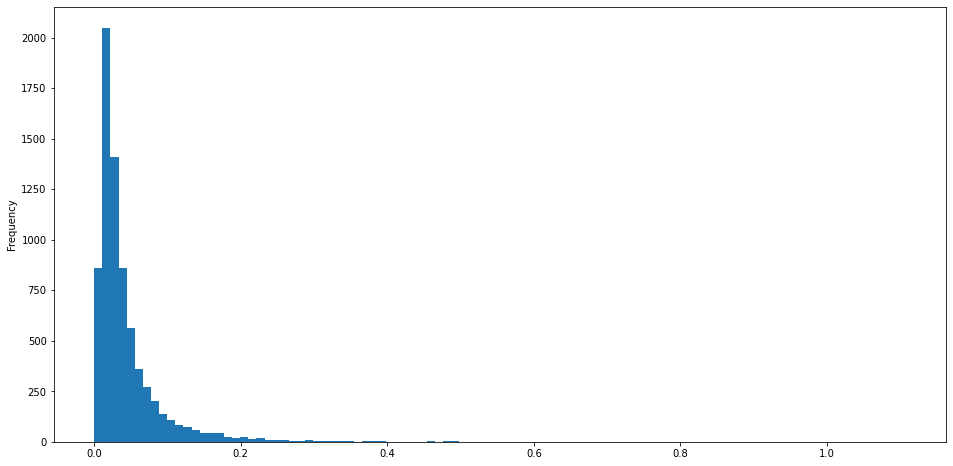

In [30]:
plt.figure(figsize=(16, 8))
df["area"].plot(kind='hist', bins = 100)

In [ ]:
# plt.figure(figsize=(16, 16))
df.plot("area", legend=True, figsize=(16, 16))

In [ ]:
# plt.figure(figsize=(16, 16))
df = df.set_geometry("centroid")
df.plot("area", legend=True, figsize=(16, 16))

In [33]:
df = df.set_geometry("geometry")

# For df2 (Aug 2020)

In [34]:
df2["area"] = df2.area

In [35]:
df2['centroid'] = df2.centroid
df2['centroid']

0       POINT (-12386059.874 3999569.488)
1       POINT (-12386059.123 3999566.551)
2       POINT (-12386059.490 3999566.273)
3       POINT (-12386058.413 3999569.855)
4       POINT (-12386057.928 3999569.859)
                      ...                
7360    POINT (-12385927.687 3999610.412)
7361    POINT (-12385920.748 3999506.777)
7362    POINT (-12385922.418 3999605.478)
7363    POINT (-12385922.833 3999603.188)
7364    POINT (-12385921.579 3999601.459)
Name: centroid, Length: 7365, dtype: geometry

<AxesSubplot:ylabel='Frequency'>

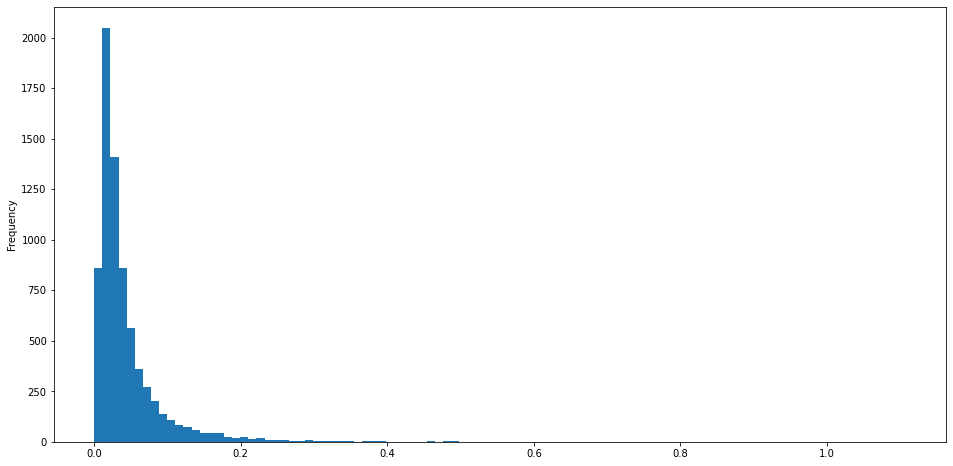

In [36]:
plt.figure(figsize=(16, 8))
df2["area"].plot(kind='hist', bins = 100)

In [ ]:
df2.plot("area", legend=True, figsize=(16, 16))

## Calculating Ecc

In [37]:
## Get Eccentricity 

import numpy as np
from scipy.spatial.distance import euclidean

def get_ecc(area_polygon):
    points = np.array(area_polygon)

    small_latwise = np.min(points[points[:, 0] == np.min(points[:, 0])], 0)
    small_lonwise = np.min(points[points[:, 1] == np.min(points[:, 1])], 0)
    big_latwise = np.max(points[points[:, 0] == np.max(points[:, 0])], 0)
    big_lonwise = np.max(points[points[:, 1] == np.max(points[:, 1])], 0)
    distance_lat = euclidean(big_latwise, small_latwise)
    distance_lon = euclidean(big_lonwise, small_lonwise)
    if distance_lat >= distance_lon:
        major_axis_length = distance_lat
        minor_axis_length = distance_lon
    else:
        major_axis_length = distance_lon
        minor_axis_length = distance_lat
    a = major_axis_length/2
    b = minor_axis_length/2
    ecc = np.sqrt(np.square(a)-np.square(b))/a
    return ecc

In [38]:
df['ecc'] = None

for j in range(len(df)):
    try:
        area_polygon = [[i[1],i[0]] for i in list(df['geometry'][j].exterior.coords)]
    except:
        area_polygon = [[i[1],i[0]]  for poly in list(df['geometry'][j]) for i in list(poly.exterior.coords) ]
    df['ecc'][j] = get_ecc(area_polygon)

In [39]:
df2['ecc'] = None

for j in range(len(df2)):
    #print(j)
    try:
        area_polygon = [[i[1],i[0]] for i in list(df2['geometry'][j].exterior.coords)]
    except:
        area_polygon = [[i[1],i[0]]  for poly in list(df2['geometry'][j]) for i in list(poly.exterior.coords)]
            
    df2['ecc'][j] = get_ecc(area_polygon)

## Perimeter of Polygons

In [40]:
df["perimeter"] = df["geometry"].length

In [41]:
df2["perimeter"] = df2["geometry"].length

<AxesSubplot:ylabel='Frequency'>

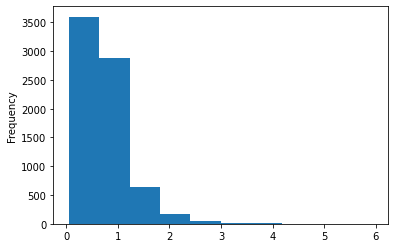

In [42]:
df2['perimeter'].plot(kind='hist')

## Compactness

In [43]:
def pp_compactness(geom): # Polsby-Popper
    p = geom.length
    a = geom.area    
    return (4*pi*a)/(p*p)

In [44]:
df["compactness"] = df.geometry.apply(pp_compactness)
df2["compactness"] = df2.geometry.apply(pp_compactness)

<AxesSubplot:ylabel='Frequency'>

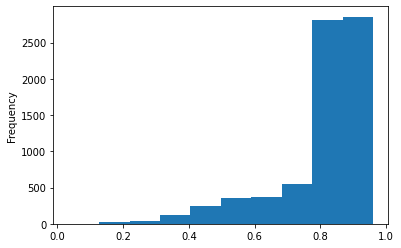

In [45]:
df2['compactness'].plot(kind='hist')

## Convexity

In [46]:
def convexity(geom): # Polsby-Popper
    p = geom.convex_hull.length
    a = geom.length    
    return (p/a)

In [47]:
df["convexity"] = df.geometry.apply(convexity)

In [48]:
df2["convexity"] = df2.geometry.apply(convexity)

<AxesSubplot:ylabel='Frequency'>

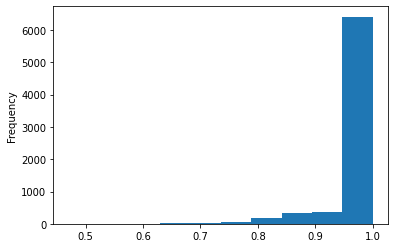

In [49]:
df2["convexity"].plot(kind='hist')

## Solidity

In [50]:
def solidity(geom): # Polsby-Popper
    convex_area = geom.convex_hull.area
    area = geom.area    
    return (area/convex_area)

In [51]:
df["solidity"] = df.geometry.apply(solidity)

In [52]:
df2["solidity"] = df.geometry.apply(solidity)

<AxesSubplot:ylabel='Frequency'>

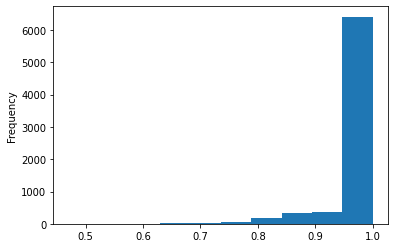

In [53]:
df2["convexity"].plot(kind='hist')

## Angle of Longest Segment of Min Rotated Rectangel 

In [54]:

def getAngle(geom):
    g = geom
    a = g.minimum_rotated_rectangle
    l = a.boundary
    coords = [c for c in l.coords]
    segments = [geometry.LineString([a, b]) for a, b in zip(coords,coords[1:])]
    longest_segment = max(segments, key=lambda x: x.length)

    p1, p2 = [c for c in longest_segment.coords]
    angle = math.degrees(math.atan2(p2[1]-p1[1], p2[0]-p1[0]))
    
    return angle

In [55]:
df.columns

Index(['mvt_id', 'DN', 'geometry', 'area', 'centroid', 'ecc', 'perimeter',
       'compactness', 'convexity', 'solidity'],
      dtype='object')

In [56]:
df = df.set_geometry('geometry')
df["angle"] = df.geometry.apply(getAngle)

In [57]:
df2 = df2.set_geometry('geometry')
df2["angle"] = df2.geometry.apply(getAngle)

<AxesSubplot:ylabel='Frequency'>

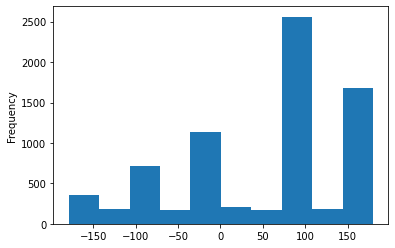

In [58]:
df["angle"].plot(kind='hist')

## Vectorization 

In [59]:
df.columns

Index(['mvt_id', 'DN', 'geometry', 'area', 'centroid', 'ecc', 'perimeter',
       'compactness', 'convexity', 'solidity', 'angle'],
      dtype='object')

In [58]:
df['feature_vec'] = None

for i in range(len(df)):
    df['feature_vec'][i] = [df["area"][i], df['ecc'][i], df['perimeter'][i], df['compactness'][i], df['convexity'][i], df['solidity'][i], df['angle'][i]]

In [59]:
df2['feature_vec'] = None

for i in range(len(df2)):
    df2['feature_vec'][i] = [df2["area"][i], df2['ecc'][i], df2['perimeter'][i], df2['compactness'][i], df2['convexity'][i], df2['solidity'][i], df2['angle'][i]]

## TS_SS Similarity 

In [60]:
import math

def Cosine(vec1, vec2) :
    result = InnerProduct(vec1,vec2) / (VectorSize(vec1) * VectorSize(vec2))
    return result

def VectorSize(vec) :
    return math.sqrt(sum(math.pow(v,2) for v in vec))

def InnerProduct(vec1, vec2) :
    return sum(v1*v2 for v1,v2 in zip(vec1,vec2))

def Euclidean(vec1, vec2) :
    return math.sqrt(sum(math.pow((v1-v2),2) for v1,v2 in zip(vec1, vec2)))

def Theta(vec1, vec2) :
    return math.acos(Cosine(vec1,vec2)) + math.radians(10)

def Triangle(vec1, vec2) :
    theta = math.radians(Theta(vec1,vec2))
    return (VectorSize(vec1) * VectorSize(vec2) * math.sin(theta)) / 2

def Magnitude_Difference(vec1, vec2) :
    return abs(VectorSize(vec1) - VectorSize(vec2))

def Sector(vec1, vec2) :
    ED = Euclidean(vec1, vec2)
    MD = Magnitude_Difference(vec1, vec2)
    theta = Theta(vec1, vec2)
    return math.pi * math.pow((ED+MD),2) * theta/360

def TS_SS(vec1, vec2) :
    return Triangle(vec1, vec2) * Sector(vec1, vec2)

vec1 = [1,2]
vec2 = [2,4]

print(Euclidean(vec1,vec2))
print(Cosine(vec1,vec2))
print(TS_SS(vec1,vec2))

2.23606797749979
0.9999999999999998
0.0004639582566999478


In [80]:
# TS_SS(df['feature_vec'][1], df2['feature_vec'][1])
df = df.drop(['nearest_matching_polygon_ts_ss', 'nearest_matching_polygon'], axis=1)

In [81]:
df.columns

Index(['mvt_id', 'DN', 'geometry', 'area', 'centroid', 'ecc', 'perimeter',
       'compactness', 'convexity', 'solidity', 'angle', 'feature_vec',
       'min_ts_ss'],
      dtype='object')

## Individual Rock Matching based on feature_vec with TS_SS 

In [ ]:
df['nearest_matching_polygon_ts_ss'] = None
df['min_ts_ss'] = 1000000000.0

for i in range(len(df)):
    
    for j in range(len(df2)):
        
        print(i, j)
        curr_ts_ss = TS_SS(df['feature_vec'][i], df2['feature_vec'][j])
        
        if df['min_ts_ss'][i] > curr_ts_ss:
            
            df['min_ts_ss'][i] = curr_ts_ss
            df['nearest_matching_polygon_ts_ss'][i] = j

In [61]:
df['nearest_matching_polygon_Euclidean'] = None
df['min_Euclidean'] = 1000000000.0

for i in range(len(df)):
    
    for j in range(len(df2)):
        
        curr_dist = Euclidean(df['feature_vec'][i], df2['feature_vec'][j])
        
        if df['min_Euclidean'][i] > curr_dist:
            
            df['min_Euclidean'][i] = curr_dist
            df['nearest_matching_polygon_Euclidean'][i] = j

<AxesSubplot:ylabel='Frequency'>

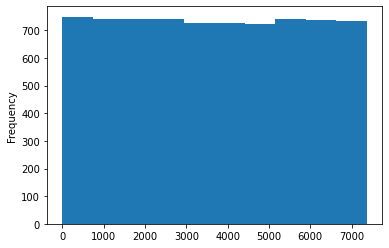

In [62]:
df['nearest_matching_polygon_Euclidean'].plot(kind='hist')

In [63]:
inc_count = 0

for i in range(len(df)):
    
    if i != df['nearest_matching_polygon_Euclidean'][i]:
        print("Breaking Point", i, df['nearest_matching_polygon_Euclidean'][i]) 
        inc_count += 1 

Breaking Point 71 6651
Breaking Point 94 5810
Breaking Point 100 1069
Breaking Point 103 2627
Breaking Point 126 1271
Breaking Point 128 7339
Breaking Point 130 1617
Breaking Point 150 1788
Breaking Point 169 2129
Breaking Point 204 2665
Breaking Point 207 261
Breaking Point 262 1411
Breaking Point 281 3464
Breaking Point 288 4181
Breaking Point 306 3650
Breaking Point 318 5608
Breaking Point 320 2850
Breaking Point 322 3814
Breaking Point 366 1379
Breaking Point 418 5921
Breaking Point 459 4486
Breaking Point 484 6222
Breaking Point 492 3654
Breaking Point 526 6106
Breaking Point 550 3794
Breaking Point 590 5195
Breaking Point 602 5229
Breaking Point 627 6636
Breaking Point 672 1202
Breaking Point 682 3559
Breaking Point 692 4406
Breaking Point 694 179
Breaking Point 708 1236
Breaking Point 728 6907
Breaking Point 748 6398
Breaking Point 749 747
Breaking Point 750 6907
Breaking Point 766 3416
Breaking Point 782 2592
Breaking Point 785 6059
Breaking Point 790 3464
Breaking Point 797 30

In [64]:
inc_count

459

## Experiment with Nearest Neighbor Polygons

In [65]:
df = df.set_geometry('geometry')
df2 = df2.set_geometry('geometry')

In [66]:
from shapely import geometry

def get_neighborhood_polygon(df, top=5):
    
    df['neighbor_polygon'] = None
    x = df.geometry.apply(lambda g: df.distance(g))
    
    for i in range(len(df)):
        y = x[i].sort_values()[:top]
        df['neighbor_polygon'][i] = geometry.Polygon([[df['centroid'][j].x, df['centroid'][j].y] for j in y.index])
    
    return df

In [67]:
df = get_neighborhood_polygon(df, 5)

In [68]:
df2 = get_neighborhood_polygon(df2, 5)

In [69]:
# neighborhood_

def get_neighbor_polygon_features(df):
    df = df.set_geometry('neighbor_polygon')

    df["neighbor_polygon_area"] = df.area
    df["neighbor_polygon_centroid"] = df.centroid 

    df['neighbor_polygon_ecc'] = None

    for j in range(len(df)):
        try:
            area_polygon = [[i[1],i[0]] for i in list(df['neighbor_polygon'][j].exterior.coords)]
        except:
            area_polygon = [[i[1],i[0]]  for poly in list(df['neighbor_polygon'][j]) for i in list(poly.exterior.coords) ]
        df['neighbor_polygon_ecc'][j] = get_ecc(area_polygon)

    df["neighbor_polygon_perimeter"] = df["neighbor_polygon"].length
    df["neighbor_polygon_compactness"] = df.geometry.apply(pp_compactness)
    df["neighbor_polygon_convexity"] = df.geometry.apply(convexity)
    df["neighbor_polygon_solidity"] = df.geometry.apply(solidity)
    df["neighbor_polygon_angle"] = df.geometry.apply(getAngle)
    return df 

In [70]:
df = get_neighbor_polygon_features(df)
df2 = get_neighbor_polygon_features(df2)

In [71]:
df['neighbor_polygon_feature_vec'] = None

for i in range(len(df)):
    df['neighbor_polygon_feature_vec'][i] = [df["neighbor_polygon_area"][i], df['neighbor_polygon_ecc'][i], df['neighbor_polygon_perimeter'][i], df['neighbor_polygon_compactness'][i], df['neighbor_polygon_convexity'][i], df['neighbor_polygon_solidity'][i], df["neighbor_polygon_angle"][i]]

In [72]:
df2['neighbor_polygon_feature_vec'] = None

for i in range(len(df2)):
    df2['neighbor_polygon_feature_vec'][i] = [df2["neighbor_polygon_area"][i], df2['neighbor_polygon_ecc'][i], df2['neighbor_polygon_perimeter'][i], df2['neighbor_polygon_compactness'][i], df2['neighbor_polygon_convexity'][i], df2['neighbor_polygon_solidity'][i], df2["neighbor_polygon_angle"][i]]

In [160]:
df['nearest_matching_neighbor_polygon'] = None
df['neighbor_polygon_min_ts_ss'] = 1000000000.0

for i in range(len(df)):
    
    for j in range(len(df2)):
        
        curr_ts_ss = TS_SS(df['neighbor_polygon_feature_vec'][i], df2['neighbor_polygon_feature_vec'][j])
        
        if df['neighbor_polygon_min_ts_ss'][i] > curr_ts_ss:
            
            df['neighbor_polygon_min_ts_ss'][i] = curr_ts_ss
            df['nearest_matching_neighbor_polygon'][i] = j

In [73]:
df['nearest_matching_neighbor_polygon_eucledian'] = None
df['neighbor_polygon_min_eucledian'] = 1000000000.0

for i in range(len(df)):
    
    for j in range(len(df2)):
        
        curr_dist = Euclidean(df['neighbor_polygon_feature_vec'][i], df2['neighbor_polygon_feature_vec'][j])
        
        if df['neighbor_polygon_min_eucledian'][i] > curr_dist:
            
            df['neighbor_polygon_min_eucledian'][i] = curr_dist
            df['nearest_matching_neighbor_polygon_eucledian'][i] = j

In [74]:
inc_count = 0

for i in range(len(df)):
    
    if i != df['nearest_matching_neighbor_polygon_eucledian'][i]:
        print("Breaking Point", i, df['nearest_matching_neighbor_polygon_eucledian'][i]) 
        inc_count += 1

Breaking Point 4 1130
Breaking Point 5 5767
Breaking Point 9 8
Breaking Point 11 5284
Breaking Point 26 27
Breaking Point 28 2212
Breaking Point 31 516
Breaking Point 34 516
Breaking Point 48 2942
Breaking Point 62 60
Breaking Point 65 56
Breaking Point 67 5521
Breaking Point 77 1985
Breaking Point 80 3015
Breaking Point 81 3015
Breaking Point 86 4143
Breaking Point 87 5767
Breaking Point 88 706
Breaking Point 100 4399
Breaking Point 106 109
Breaking Point 111 4603
Breaking Point 122 124
Breaking Point 140 5075
Breaking Point 142 1011
Breaking Point 154 2931
Breaking Point 155 4569
Breaking Point 172 1577
Breaking Point 175 50
Breaking Point 176 50
Breaking Point 189 2427
Breaking Point 193 194
Breaking Point 199 3022
Breaking Point 202 466
Breaking Point 206 3154
Breaking Point 223 4778
Breaking Point 231 3107
Breaking Point 238 4713
Breaking Point 254 2294
Breaking Point 258 3787
Breaking Point 259 3155
Breaking Point 260 210
Breaking Point 261 1084
Breaking Point 265 267
Breaking Po

In [75]:
inc_count 

2066

## Visualization

In [101]:
def get_centroid_and_line(name, df):
    
    df['matching_centroid_neighbor_polygon'] = None
    
    for i in range(len(df)):
        df['matching_centroid_neighbor_polygon'][i] = df2['centroid'][df['nearest_matching_neighbor_polygon_eucledian'][i]]
    
    df['line_neighbor_polygon'] = df.apply(lambda x: geometry.LineString([x['centroid'], x['matching_centroid_neighbor_polygon']]), axis=1)
    
    return df 

In [102]:
df = get_centroid_and_line('', df)

In [103]:
df.head()

,mvt_id,DN,geometry,area,centroid,ecc,perimeter,compactness,convexity,solidity,...,neighbor_polygon_convexity,neighbor_polygon_solidity,neighbor_polygon_angle,neighbor_polygon_feature_vec,nearest_matching_neighbor_polygon_eucledian,neighbor_polygon_min_eucledian,matching_centroid,line,matching_centroid_neighbor_polygon,line_neighbor_polygon
0,None,4.0,"POLYGON ((-12386059.874 3999557.689, -12386059...",0.110830,POINT (-12386059.874 3999557.488),0.15098,1.263292,0.872687,0.990184,0.985294,...,0.759545,0.370876,-40.215333,"[0.7558181595492708, 0.5113240204056598, 7.644...",0,3.687153e-08,POINT (-12386059.874023465 3999569.4883176074),LINESTRING (-12386059.874023465 3999557.488317...,POINT (-12386059.874023465 3999569.4883176074),LINESTRING (-12386059.874023465 3999557.488317...
1,None,4.0,"POLYGON ((-12386059.071 3999554.741, -12386059...",0.080184,POINT (-12386059.123 3999554.551),0.570022,1.116324,0.808568,0.955750,0.947044,...,0.946296,0.109753,-158.639106,"[0.0823284329310342, 0.5464210601962202, 4.856...",1,7.905790e-08,POINT (-12386059.122707251 3999566.551036169),LINESTRING (-12386059.122707251 3999554.551036...,POINT (-12386059.122707251 3999566.551036169),LINESTRING (-12386059.122707251 3999554.551036...
2,None,4.0,"POLYGON ((-12386059.538 3999554.349, -12386059...",0.024726,POINT (-12386059.490 3999554.273),0.667377,0.605104,0.848586,1.000000,1.000000,...,0.938448,0.476749,-158.639106,"[0.35762067012049403, 0.5464210601962202, 4.89...",2,7.906058e-08,POINT (-12386059.490237614 3999566.27278651),LINESTRING (-12386059.490237614 3999554.272786...,POINT (-12386059.490237614 3999566.27278651),LINESTRING (-12386059.490237614 3999554.272786...
3,None,4.0,"POLYGON ((-12386058.418 3999557.932, -12386058...",0.016455,POINT (-12386058.413 3999557.855),0.54139,0.505949,0.807766,0.993694,0.976744,...,0.886010,0.755627,109.452096,"[0.30606119575051355, 0.8620064510392205, 3.34...",3,2.835175e-08,POINT (-12386058.412541218 3999569.85451099),LINESTRING (-12386058.412541218 3999557.854510...,POINT (-12386058.412541218 3999569.85451099),LINESTRING (-12386058.412541218 3999557.854510...
4,None,4.0,"POLYGON ((-12386057.896 3999557.932, -12386057...",0.018152,POINT (-12386057.928 3999557.859),0.173785,0.492649,0.939872,1.000000,1.000000,...,0.807415,0.573865,-39.787731,"[0.21692777752938153, 0.2999191653607475, 3.81...",1130,5.942310e-01,POINT (-12386057.927524421 3999569.858675071),LINESTRING (-12386057.927524421 3999557.858675...,POINT (-12386034.537287528 3999591.2871091967),LINESTRING (-12386057.927524421 3999557.858675...


In [104]:
df_sorted = df.sort_values('neighbor_polygon_min_eucledian')
df_sorted.reset_index(drop=True, inplace=True)

In [105]:
df_sorted['min_Euclidean']

0       0.000000e+00
1       1.629720e-01
2       0.000000e+00
3       0.000000e+00
4       0.000000e+00
            ...     
7360    0.000000e+00
7361    1.059047e-07
7362    0.000000e+00
7363    0.000000e+00
7364    0.000000e+00
Name: min_Euclidean, Length: 7365, dtype: float64

In [106]:
df = df.set_geometry('geometry')
df2 = df2.set_geometry('geometry')

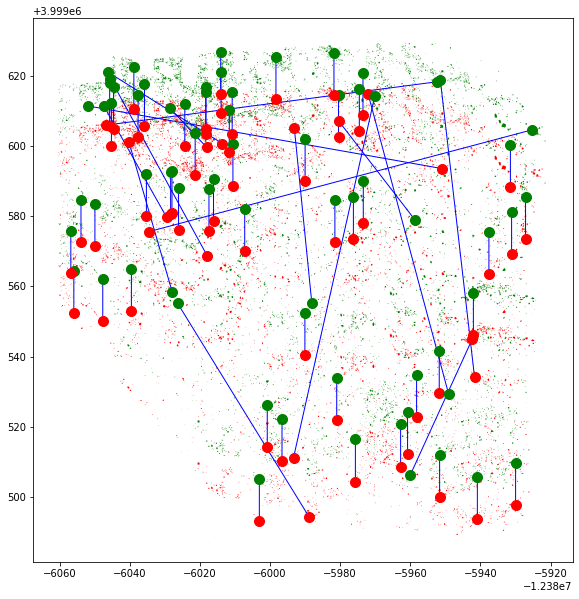

In [108]:
fig, ax = plt.subplots(figsize = (10,10))
fig.patch.set_facecolor('white')


df2.plot(color = 'g', ax=ax, figsize=(10,10))
df.plot(color = 'r', ax=ax , figsize=(10,10))

for i in range(0, 7000, 100):
        #i = 10
        xy = [y for y in df_sorted['line_neighbor_polygon'][i].coords]
        #xy = (x[i],y[i])
        con = ConnectionPatch(xyA=xy[1], xyB=xy[0], coordsA="data", coordsB="data",
                              axesA=ax, axesB=ax, color="blue")
        ax.add_artist(con)

        ax.plot(xy[1][0],xy[1][1],'ro',markersize=10,color='g')
        ax.plot(xy[0][0],xy[0][1],'ro',markersize=10, color='r')

fig.show()